## Esercizio 2

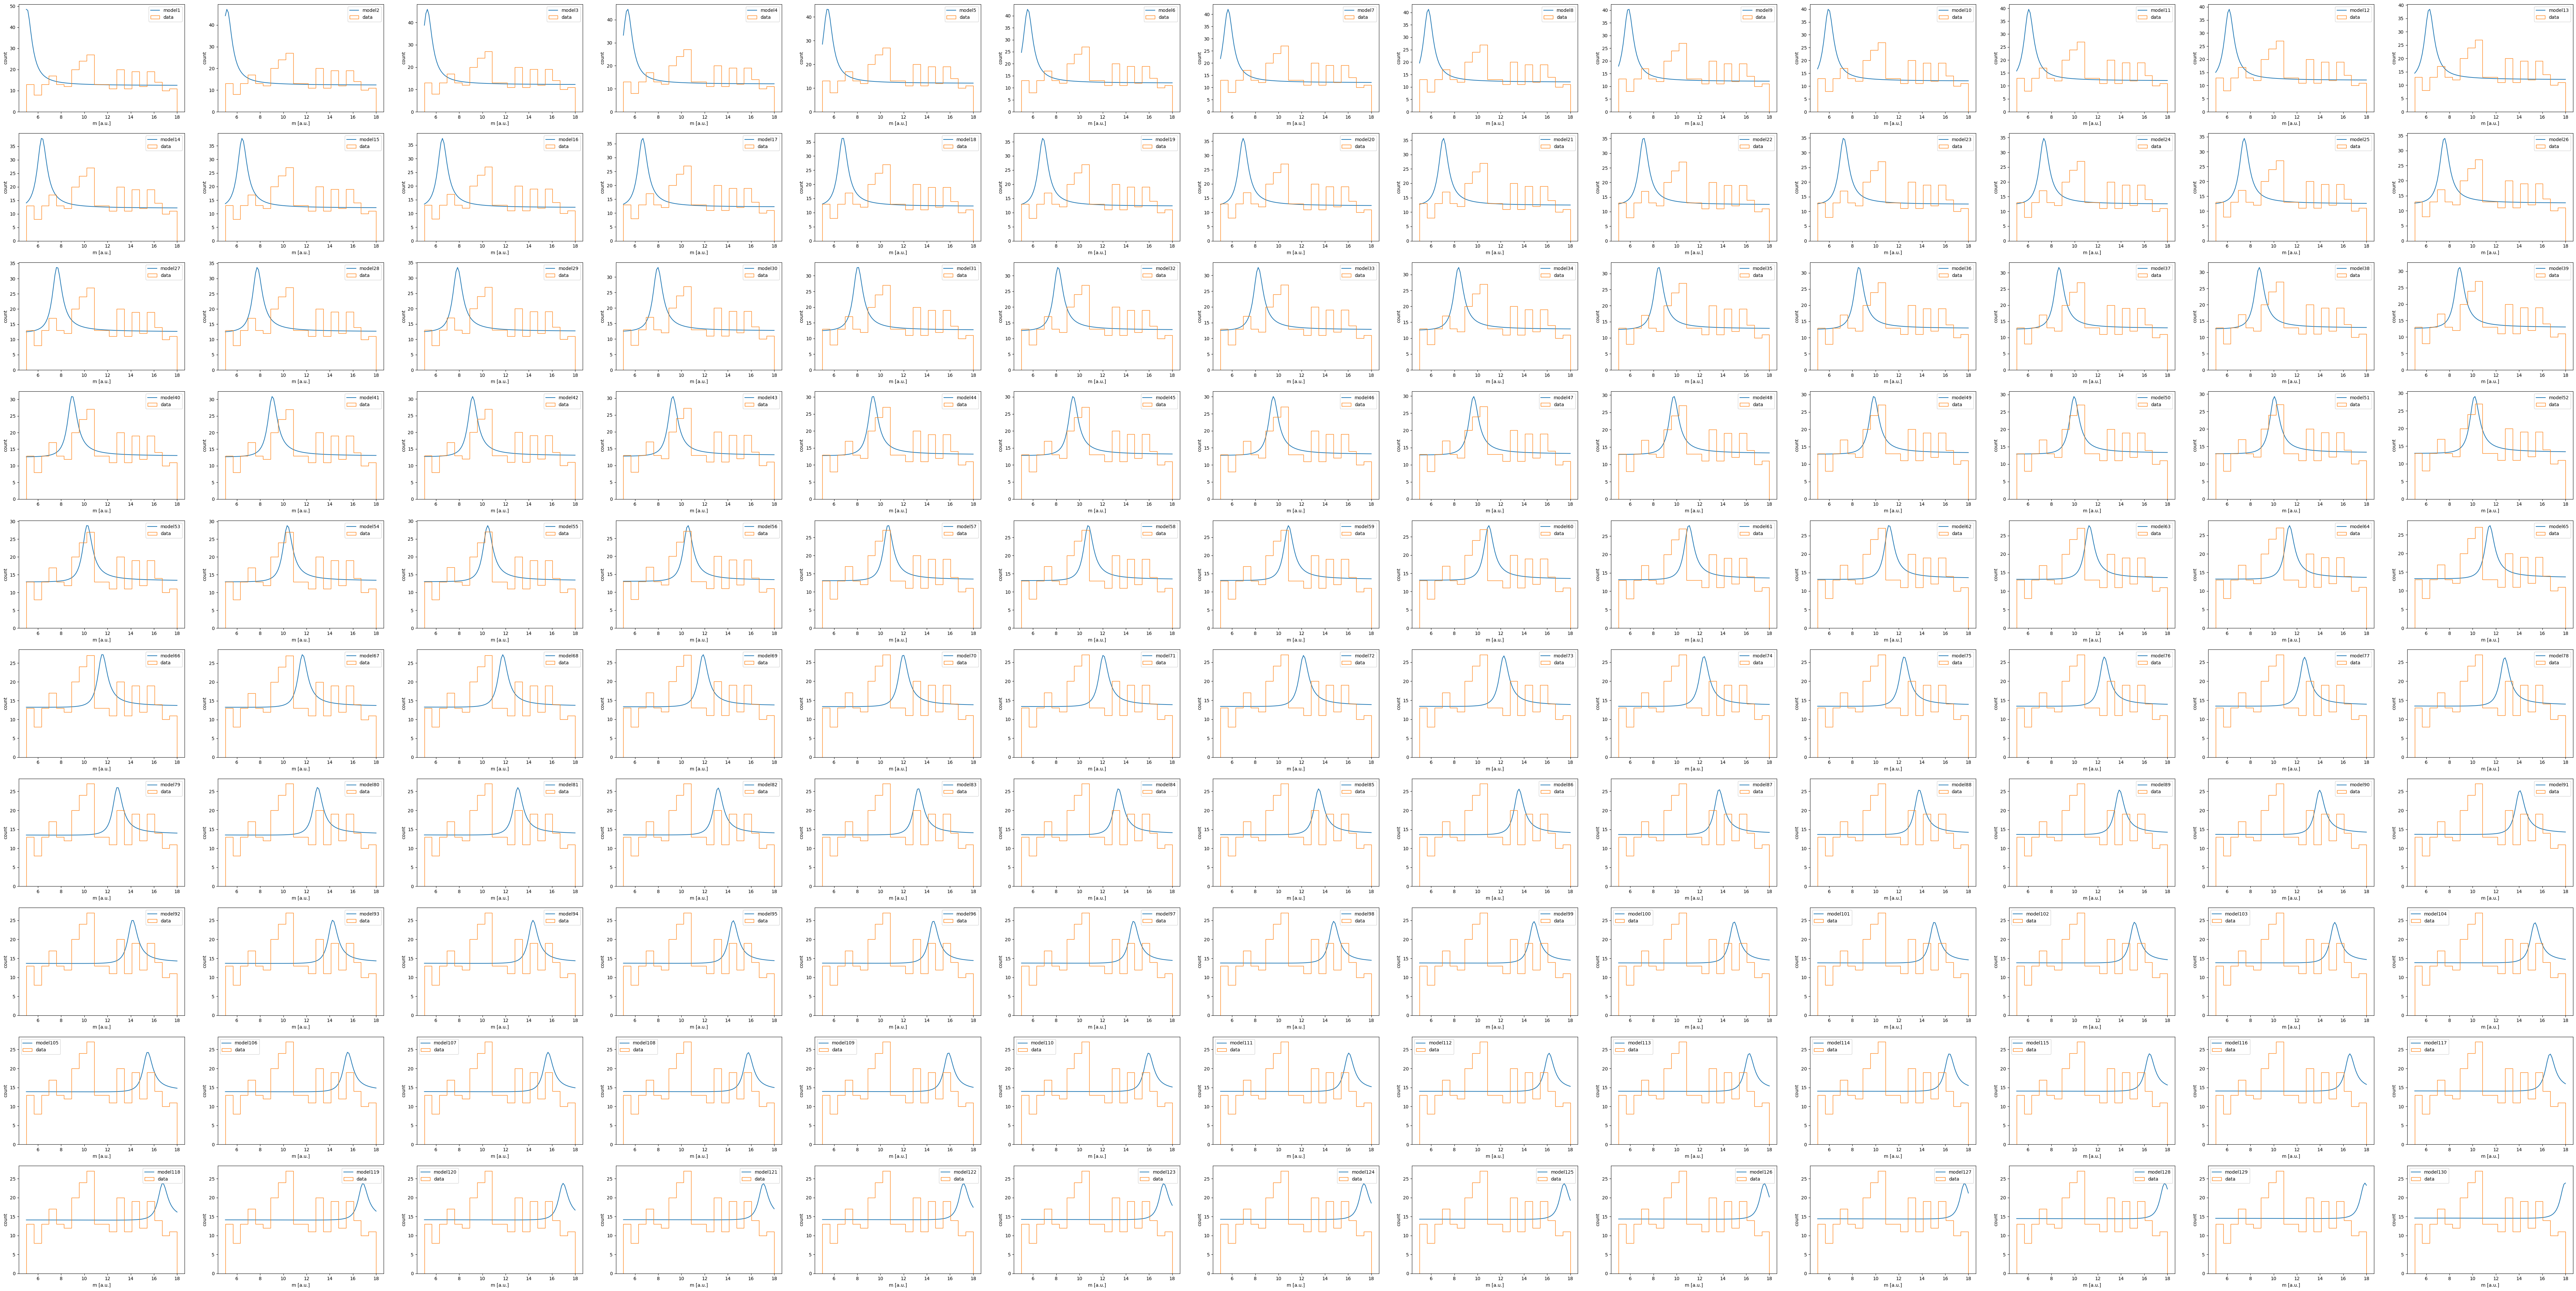

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import simpson
from scipy.stats import chi2,norm
from scipy.optimize import minimize
np.random.seed(276884)
#np.random.seed(10)

def model(x,pars,m0):
    a = pars[0]
    theta = np.pi/2.-0.3
    m0 = m0
    gamma = 1
    xint = np.linspace(5,18,10001)
    val_model = lambda x: np.abs(1+a*np.exp(1j*theta)/((x**2-(m0)**2)+1j*m0*gamma))**2
    if (type(a) is not np.ndarray) and type(theta) is not np.ndarray:
        integral = simpson(val_model(xint),xint)
        return val_model(x)/integral
    else:
        a = a.reshape(-1,1)
        theta = theta.reshape(-1,1)
        integral = simpson(val_model(xint),xint,axis=1).reshape(-1,1)
        return val_model(x)/integral    
    #return 1+(np.power(a,2)+2*a*np.sin(theta)*m0*gamma+2*a*(np.power(x,2)-np.power(m0,2))*np.cos(theta))/( np.power(np.power(x,2)-np.power(m0,2),2)+np.power(m0*gamma,2) )

data = np.loadtxt("data.txt", usecols=0)

ndata = 300

masses = np.arange(5, 18, 0.1)
i = 1
plt.figure(figsize=(100,50))
for m0 in masses:
    thetaval = np.pi/2.-0.3
    aval = 5
    x = np.linspace(5,18,101)
    ymodel = model(x,[aval,thetaval],m0)

    len(data)
    nbins = 20
    plt.subplot(10, 13, i)
    plt.plot(x,ymodel*ndata*(x.max()-x.min())/nbins,label='model' + str(i))
    plt.hist(data,bins=np.linspace(x.min(),x.max(),nbins+1),histtype='step',label='data')
    plt.xlabel('m [a.u.]')
    plt.ylabel('count')
    plt.legend(loc='best')
    i+= 1

plt.savefig("pre_fit.pdf")
plt.show()

In [4]:
a_values = []
t_null = []
t = []
x = np.arange(5, 18, 0.1)

def nll(data,model,pars):
    log = np.log(model(data,pars,m0))
    if len(log.shape)==1: return -np.sum(np.log(model(data,pars,m0)))
    else: return -np.sum(np.log(model(data,pars,m0)),axis=1)

i = 0

for m0 in masses:
    fit = minimize(lambda pars: nll(data, model, pars), x0=[aval, m0], bounds=((-np.inf, +np.inf),(m0,m0)))
    a_values.append(fit.x[0])
    t.append(-2 * (fit.fun - nll(data,model,[0,0])))

p_array = []
stds = []
for my_t in t:
    p_array.append(1-chi2(1).cdf(my_t))
for i in range(130):
    stds.append(np.abs(norm.ppf(1 - p_array[i])))



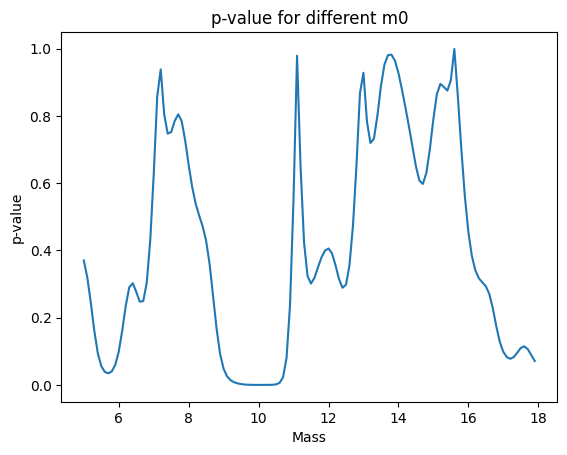

In [7]:
plt.figure()
plt.plot(masses, p_array)
plt.title('p-value for different m0')
plt.xlabel('Mass')
plt.ylabel('p-value')
plt.savefig('p_values.pdf')
plt.show()

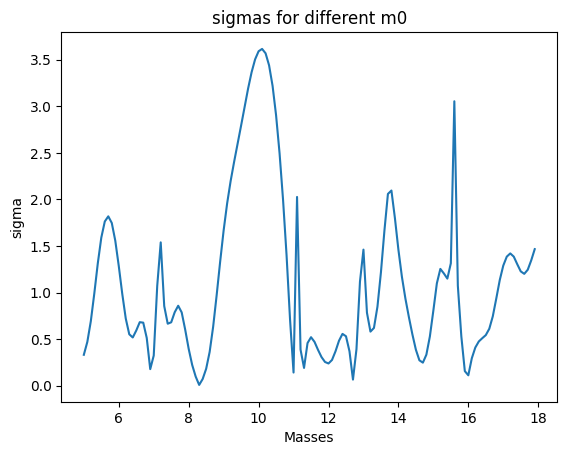

In [8]:
plt.figure()
plt.plot(masses, stds)
plt.title('sigmas for different m0')
plt.xlabel('Masses')
plt.ylabel('sigma')
plt.savefig('sigmas.pdf')
plt.show()

In [40]:
t_min = np.argmax(t)
m0_best = masses[t_min]

print(m0_best)
print(t_min)

10.099999999999982
51


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 762.295875842957
        x: [ 5.095e+00  1.009e+01]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.652e+00 -8.373e-03]
            [-8.373e-03  4.052e-02]]
     nfev: 27
     njev: 9


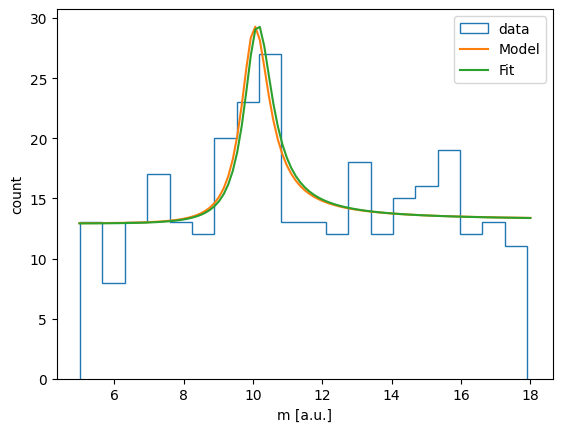

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import simpson
from scipy.stats import chi2,norm
from scipy.optimize import minimize
np.random.seed(276884)
#np.random.seed(10)

from scipy.optimize import minimize

data = np.loadtxt("data.txt", usecols=0)
m0 = 10

def model(x,pars):
    a = pars[0]
    theta = np.pi/2.-0.3
    m0 = pars[1]
    gamma = 1
    xint = np.linspace(5,18,10001)
    val_model = lambda x: np.abs(1+a*np.exp(1j*theta)/((x**2-(m0)**2)+1j*m0*gamma))**2
    if (type(a) is not np.ndarray) and type(theta) is not np.ndarray:
        integral = simpson(val_model(xint),xint)
        return val_model(x)/integral
    else:
        a = a.reshape(-1,1)
        theta = theta.reshape(-1,1)
        integral = simpson(val_model(xint),xint,axis=1).reshape(-1,1)
        return val_model(x)/integral
    
def model_useless(x,pars):
    a = pars[0]
    theta = pars[1]
    m0 = 10
    gamma = 1
    xint = np.linspace(5,18,10001)
    val_model = lambda x: np.abs(1+a*np.exp(1j*theta)/((x**2-(m0)**2)+1j*m0*gamma))**2
    if (type(a) is not np.ndarray) and type(theta) is not np.ndarray:
        integral = simpson(val_model(xint),xint)
        return val_model(x)/integral
    else:
        a = a.reshape(-1,1)
        theta = theta.reshape(-1,1)
        integral = simpson(val_model(xint),xint,axis=1).reshape(-1,1)
        return val_model(x)/integral    
    
def generate_data(a,theta):
    x = np.random.uniform(5,18,1000000)
    y = model_useless(x,[a,theta])
    return x[np.random.uniform(0,np.max(y),1000000)<y][:ndata]
    
def nll(data,model,pars):
    log = np.log(model(data,pars))
    if len(log.shape)==1: return -np.sum(np.log(model(data,pars)))
    else: return -np.sum(np.log(model(data,pars)),axis=1)

fit_result = minimize(lambda pars: nll(data,model,pars),x0=[aval,m0])
print(fit_result)
nbins = 20
x = np.linspace(5,18,101)
plt.hist(data,histtype='step',bins=nbins,label='data')
plt.plot(x,model(x,pars=[aval,m0])*ndata*(x.max()-x.min())/nbins,label='Model')
plt.plot(x,model(x,pars=fit_result.x)*ndata*(x.max()-x.min())/nbins,label='Fit')
plt.legend(loc='best')
plt.xlabel('m [a.u.]')
plt.ylabel('count')
plt.savefig('fit.pdf')

t_obs = 14.377863
p-value = 0.000900
significance = 3.121389


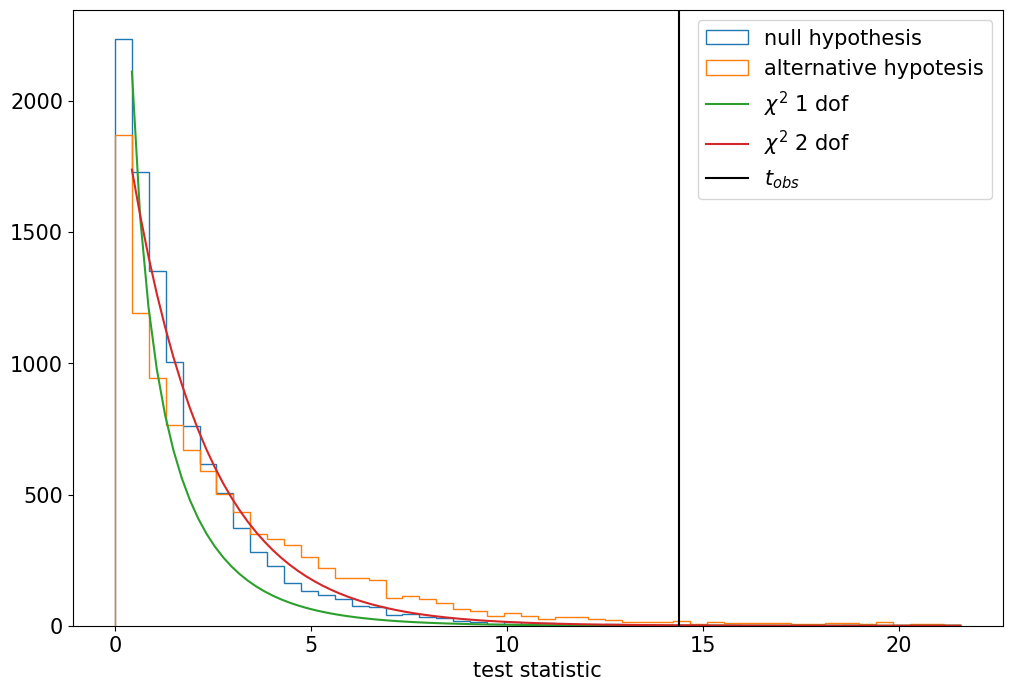

In [68]:
ntoys = 10000
aval = 5
thetaval = np.pi/2. - 0.3

t_null = []
t_alt = []
t_obs = -2*( fit_result.fun - nll(data,model,pars=[0,0]))
for i in range(ntoys):
    toy_data_bkg = generate_data(a=0,theta=0)
    result_bkg = minimize(lambda pars: nll(toy_data_bkg,model,pars),x0=[0,0])
    t_null.append( -2*(result_bkg.fun-nll(toy_data_bkg,model,pars=[0,0])) )
    toy_data_sig = generate_data(a=aval,theta=thetaval)
    result_sig = minimize(lambda pars: nll(toy_data_sig,model,pars),x0=[aval,thetaval])
    t_alt.append( -2*(result_sig.fun-nll(toy_data_sig,model,pars=[0,0])) )

t_null = np.array(t_null)
nbins = 50
_,bins,_=plt.hist(t_null,bins=nbins,histtype='step',label='null hypothesis')
_=plt.hist(t_alt,bins=bins,histtype='step',label='alternative hypotesis')
x = np.linspace(bins[1:].min(),bins.max(),101)
plt.xlabel('test statistic')
plt.plot(x,chi2(1).pdf(x)*ntoys*(bins.max()-bins.min())/nbins,label='$\chi^2$ 1 dof')
plt.plot(x,chi2(2).pdf(x)*ntoys*(bins.max()-bins.min())/nbins,label='$\chi^2$ 2 dof')
plt.axvline(t_obs,color='black',label='$t_{obs}$')
plt.legend(loc='best')
pvalue = len(t_null[t_null>=t_obs])/len(t_null)
print('t_obs = %f'%t_obs)
print('p-value = %f'%pvalue)
print('significance = %f'%(norm.ppf(1-pvalue)))